In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- A. Choose features other than the ones used in the lesson.
- B. Visualize the results of your clustering.
- C. Use the elbow method to visually select a good value for k.
- D. Repeat the clustering, this time with 3 different features.

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# data split
train_and_validate, test = train_test_split(iris, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

# scale
scaler = StandardScaler()
# cloumns to scale
cols = ['petal_width', 'sepal_width']
# Creating a train scaled copy and an original copy
train_scaled = train.copy()
# Fit and transform the data The "fit" part applies to the feature extractor itself: it determines what 
# features it will base future transformations on. The "transform" part is what takes the data and returns
# some transformed data back at you.
train_scaled[cols] = scaler.fit_transform(train[cols])

In [5]:
# Want to make sure to use the scaled trained data
# Choose the features to to cluster on 
X = train_scaled[['petal_width', 'sepal_width']]
# Choose the KMeans clusters
kmeans = KMeans(n_clusters=4)
# Create and fit the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
# Create a DF showing the centers of the clusters. They are from the scaled data
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_width,sepal_width
0,-1.309531,0.478383
1,0.155728,-0.982716
2,0.956773,0.138616
3,-1.278824,1.862740


In [7]:
# There are labels_ that were created when running the model. This labels each row of data to a corresponding 
# cluster
kmeans.labels_.shape

(96,)

In [8]:
# Creating a column cluster from the labels_
train['cluster'] = kmeans.labels_

In [9]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
54,6.5,2.8,4.6,1.5,versicolor,1
65,6.7,3.1,4.4,1.4,versicolor,2
118,7.7,2.6,6.9,2.3,virginica,2
38,4.4,3.0,1.3,0.2,setosa,0
32,5.2,4.1,1.5,0.1,setosa,3


In [10]:
# Centroid of each cluster
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,4.884211,3.263158,1.468421,0.247368
1,5.778788,2.612121,4.221212,1.327273
2,6.673529,3.111765,5.385294,1.917647
3,5.330000,3.880000,1.500000,0.270000


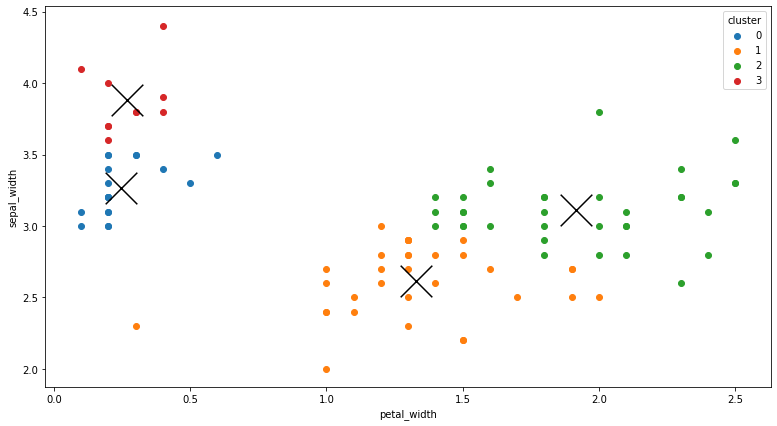

In [12]:
fig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in train.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.petal_width, subset.sepal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal width', xlabel='petal width')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=1000, ax=ax, c='black')

In [13]:
# sum of squared distances from each point to its cluster center. Used when trying to figure out how many
# Clusters we want to use via the elbow method
kmeans.inertia_

39.57056812765737

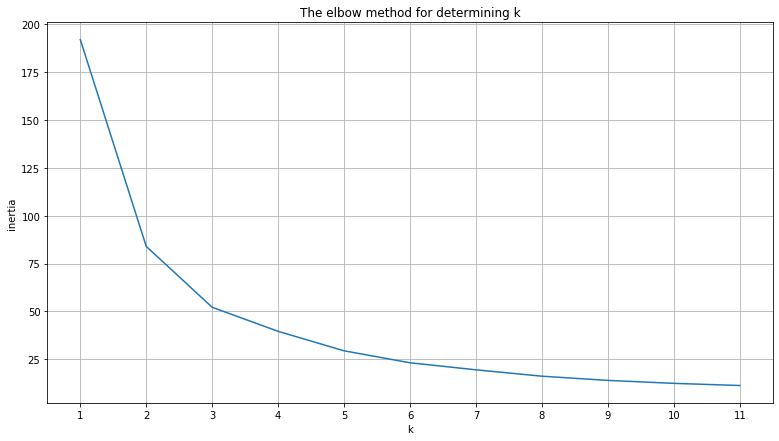

In [14]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()
# So at 4 my kmeans shows the inertia calculated above. Should use k =3 based off the graph

## D. Repeat the clustering, this time with 3 different features.

In [15]:
# Want to make sure to use the scaled trained data. Changing to 3 features and 3 clusters
# Choose the features to to cluster on 
X = train_scaled[['sepal_length', 'sepal_width']]
# Choose the KMeans clusters
kmeans = KMeans(n_clusters=3)
# Create and fit the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# Create a DF showing the centers of the clusters. They are from the scaled data
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,sepal_length,sepal_width
0,5.664516,-1.017159
1,6.742857,0.086565
2,5.070000,0.950072


In [17]:
# Creating a column cluster from the labels_
train['cluster'] = kmeans.labels_

In [18]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
54,6.5,2.8,4.6,1.5,versicolor,1
65,6.7,3.1,4.4,1.4,versicolor,1
118,7.7,2.6,6.9,2.3,virginica,1
38,4.4,3.0,1.3,0.2,setosa,2
32,5.2,4.1,1.5,0.1,setosa,2


In [19]:
# Centroid of each cluster
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.664516,2.596774,4.229032,1.377419
1,6.742857,3.088571,5.337143,1.848571
2,5.070000,3.473333,1.580000,0.300000


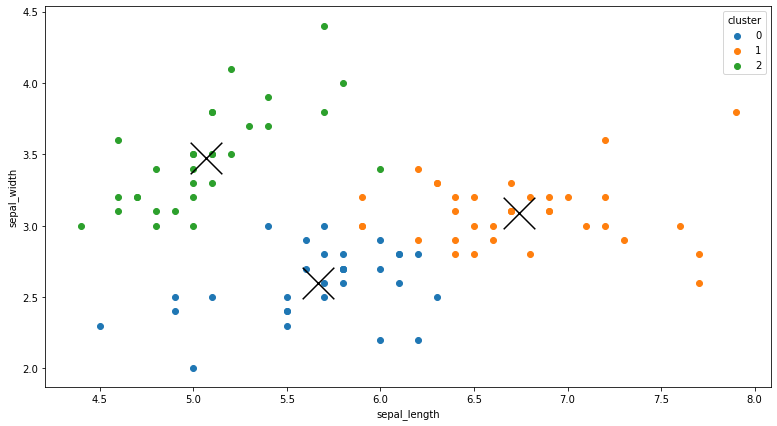

In [20]:
fig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in train.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.sepal_length, subset.sepal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal width', xlabel='sepal length')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='sepal_length', marker='x', s=1000, ax=ax, c='black')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [21]:
import wrangle_mall as w
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler

In [22]:
df = w.new_mall_data()
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
train, validate, test = w.prep_mall_data(df)
train.head()

,age,annual_income,spending_score,gender_male
123,39,69,91,1
76,45,54,53,0
171,28,87,75,1
10,67,19,14,1
35,21,33,81,0


In [42]:
# Setting the scaler used
scaler = StandardScaler()
# Columns scaling on
cols = ['age', 'annual_income', 'spending_score']
# A scaled trained df copy to keep the original data
train_scaled = train.copy()
# Fit and transform the data
train_scaled[cols] = scaler.fit_transform(train[cols])

In [43]:
# Want to make sure to use the scaled trained data
# Choose the features to to cluster on 
X = train_scaled[['age', 'annual_income']]
# Choose the KMeans clusters
kmeans = KMeans(n_clusters=4)
# Create and fit the model
kmeans.fit(X)
# Creating cluster labels column
train['cluster'] = kmeans.labels_

In [44]:
train.head()

,age,annual_income,spending_score,gender_male,cluster
123,39,69,91,1,2
76,45,54,53,0,3
171,28,87,75,1,2
10,67,19,14,1,3
35,21,33,81,0,1


In [45]:
# Centroid of each cluster
train.groupby('cluster').mean()

,age,annual_income,spending_score,gender_male
cluster,,,,
0,38.583333,109.583333,50.416667,0.333333
1,25.958333,28.458333,62.375000,0.375000
2,30.731707,71.975610,55.195122,0.390244
3,55.914286,51.400000,41.800000,0.400000


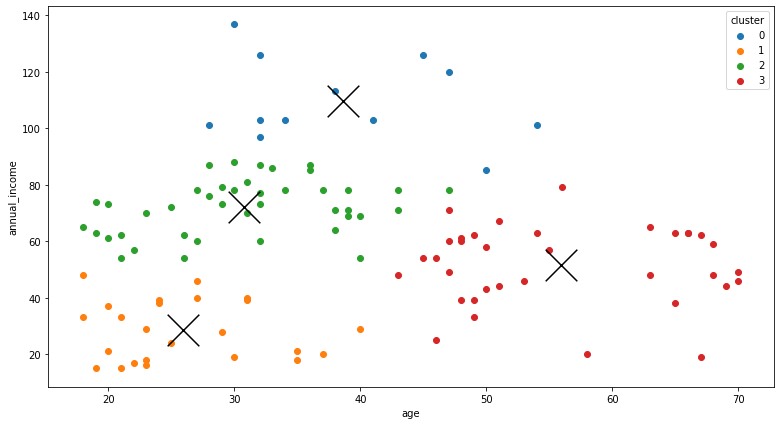

In [46]:
fig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in train.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.age, subset.annual_income, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='anual_income', xlabel='age')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
train.groupby('cluster').mean().plot.scatter(y='annual_income', x='age', marker='x', s=1000, ax=ax, c='black')

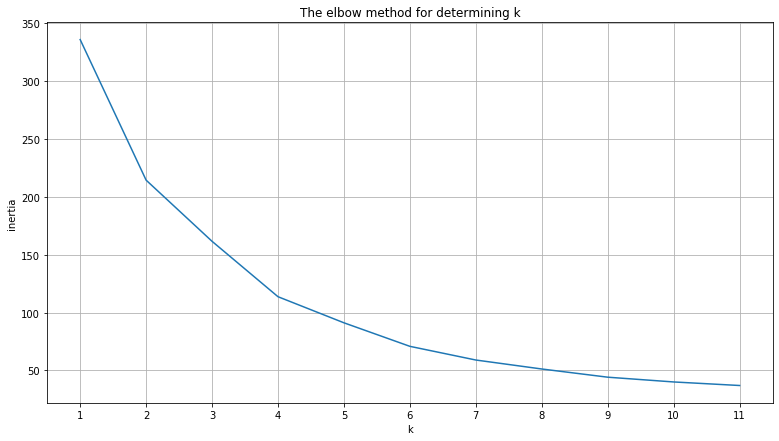

In [32]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()
# So at 4 my kmeans shows the inertia calculated above. Should use k =3 based off the graph

In [33]:
# Setting the scaler used
scaler = StandardScaler()
# Columns scaling on
cols = ['age', 'annual_income', 'spending_score']
# A scaled trained df copy to keep the original data
train_scaled = train.copy()
# Fit and transform the data
train_scaled[cols] = scaler.fit_transform(train[cols])

In [39]:
# Want to make sure to use the scaled trained data
# Choose the features to to cluster on 
X = train_scaled[['annual_income', 'spending_score']]
# Choose the KMeans clusters moved to 5 based on the elbow graph above
kmeans = KMeans(n_clusters=5)
# Create and fit the model
kmeans.fit(X)
# Creating cluster labels column
train['cluster'] = kmeans.labels_

In [40]:
# Centroid of each cluster
train.groupby('cluster').mean()

,age,annual_income,spending_score,gender_male
cluster,,,,
0,32.478261,87.304348,80.173913,0.434783
1,44.065217,56.108696,49.152174,0.369565
2,23.071429,26.214286,79.500000,0.428571
3,38.705882,86.823529,19.941176,0.352941
4,45.666667,26.333333,22.583333,0.333333


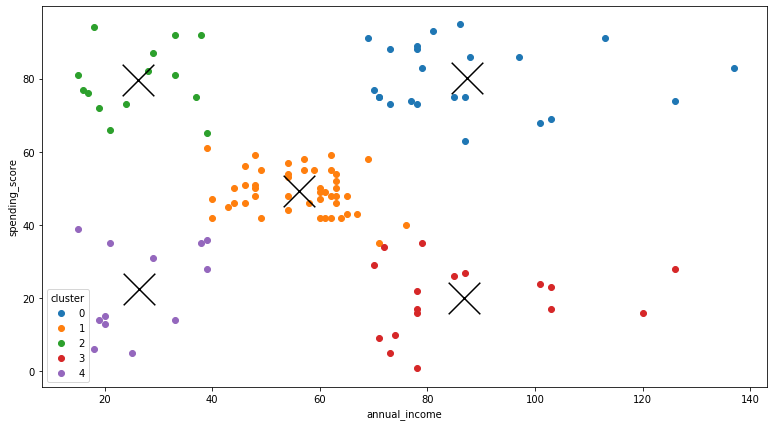

In [41]:
fig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in train.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.annual_income, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='spending score', xlabel='annual income')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
train.groupby('cluster').mean().plot.scatter(y='spending_score', x='annual_income', marker='x', s=1000, ax=ax, c='black')

# Insurance Data

In [47]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/ad9305acb30b00f768d4541a41f5ba19/raw/01f4ac8f158e68b0d293ff726c0c1dd08cdd501d/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [48]:

# data split
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

# scale
scaler = StandardScaler()
cols = ['age', 'bmi', 'charges']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [49]:
X = train_scaled[['age', 'bmi', 'children', 'smoker', 'charges']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.labels_

In [50]:
pd.concat([
    train.groupby('cluster').mean(),
    train.groupby('cluster').size().rename('n_observations'),
], axis=1)

,age,sex,bmi,children,smoker,region,charges,n_observations
cluster,,,,,,,,
0,25.613636,0.522727,25.490682,0.431818,0.159091,1.386364,6058.592674,44
1,52.645833,0.500000,28.057396,0.312500,0.145833,1.395833,13285.898501,48
2,38.942857,0.714286,35.513429,1.114286,1.000000,1.628571,40768.086437,35
3,34.194444,0.527778,36.551389,0.305556,0.000000,1.666667,5170.389403,36
4,41.559322,0.440678,30.906949,2.661017,0.118644,1.508475,12239.837004,59
